# Support Vector Machine (SVM)<br>
This is a two part assignment<br>
First we will implement SVM on 2D dataset to have a good picture about the algorithm<br>
Then we will implement SVM on e-mails dataset inorder to classify it<br><br>
As usual let's start with loading the pacakges and the dataset do some visualizations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.svm import SVC
import re
from nltk.stem import PorterStemmer

In [2]:
mat = loadmat("./Data/ex6data1.mat")
X = mat["X"]
y = mat["y"]

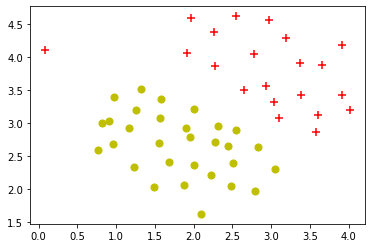

In [3]:
m, n = X.shape[0],X.shape[1]
pos,neg= (y==1).reshape(m,1), (y==0).reshape(m,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

Now we use pre-implemented SVC in the "sklearn" package

In [6]:
classifier = SVC(kernel="linear")
classifier.fit(X, np.ravel(y))

SVC(kernel='linear')

(1.5, 5.0)

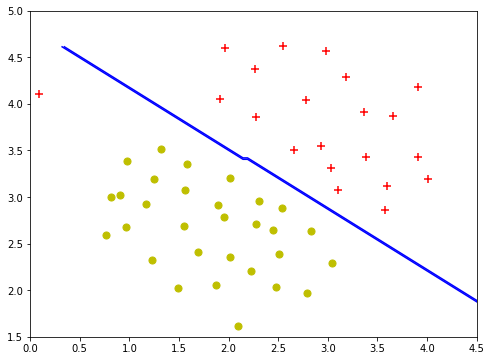

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

# plotting the decision boundary
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

In [9]:
# Test C = 100
classifier2 = SVC(C=100,kernel="linear")
classifier2.fit(X,np.ravel(y))

SVC(C=100, kernel='linear')

(1.5, 5.0)

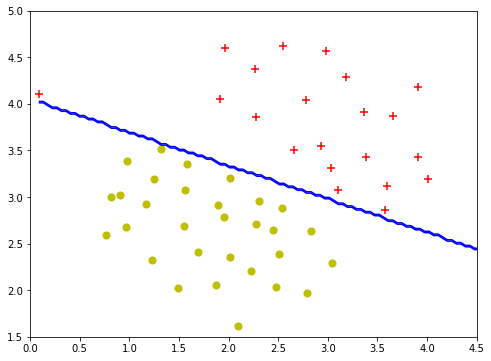

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

# plotting the decision boundary
X_3,X_4 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_3,X_4,classifier2.predict(np.array([X_3.ravel(),X_4.ravel()]).T).reshape(X_3.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

### SVM with Gaussian Kernels<br>
I did not implement the the kernel I used the pre-implemented one in "sklearn" package but this article helped with understanding it along with "Data Mining 4th Edition" Book <br>
https://www.google.com/search?client=safari&rls=en&q=Understanding+the+kernel+trick.&ie=UTF-8&oe=UTF-8

As we will use high complex kernal we need non-linear data

In [12]:
mat2 = loadmat("./Data/ex6data2.mat")
X2 = mat2["X"]
y2 = mat2["y"]

(0.4, 1.0)

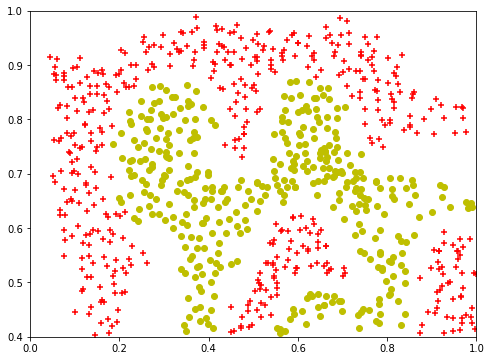

In [13]:
m2,n2 = X2.shape[0],X2.shape[1]
pos2,neg2= (y2==1).reshape(m2,1), (y2==0).reshape(m2,1)
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")
plt.xlim(0,1)
plt.ylim(0.4,1)

In [14]:
classifier3 = SVC(kernel="rbf",gamma=30)
classifier3.fit(X2,y2.ravel())

SVC(gamma=30)

Visualising the decision boundary

(0.4, 1.0)

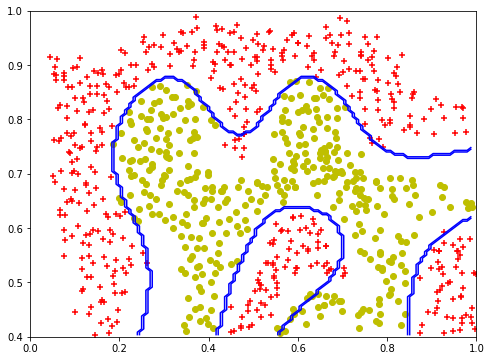

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")


# plotting the decision boundary
X_5,X_6 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
plt.contour(X_5,X_6,classifier3.predict(np.array([X_5.ravel(),X_6.ravel()]).T).reshape(X_5.shape),1,colors="b")
plt.xlim(0,1)
plt.ylim(0.4,1)

Another Dataset we wil work with but this time we will implement method to tune our hyperparameters

In [16]:
mat3 = loadmat("./Data/ex6data3.mat")
X3 = mat3["X"]
y3 = mat3["y"]
Xval = mat3["Xval"]
yval = mat3["yval"]

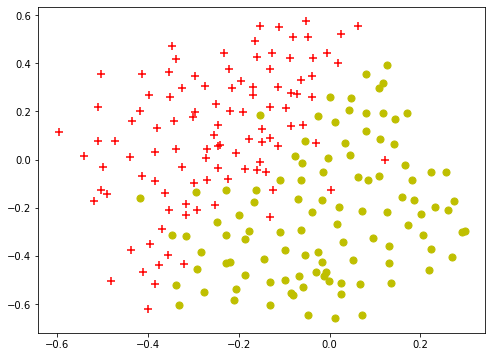

In [17]:
m3,n3 = X3.shape[0],X3.shape[1]
pos3,neg3= (y3==1).reshape(m3,1), (y3==0).reshape(m3,1)
plt.figure(figsize=(8,6))
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c="r",marker="+",s=50)
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c="y",marker="o",s=50)

Now implement our tuning funcation

In [18]:
def dataset3Params(X, y, Xval, yval,vals):
    acc = 0
    best_c = 0
    best_gamma = 0
    for i in vals:
        C = i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C = C, gamma = gamma)
            classifier.fit(X, y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc = score
                best_c = C
                best_gamma = gamma
    return best_c, best_gamma

In [19]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C, gamma = dataset3Params(X3, y3.ravel(), Xval, yval.ravel(),vals)
classifier4 = SVC(C = C, gamma = gamma)
classifier4.fit(X3, y3.ravel())

SVC(C=0.3, gamma=100.0)

(-0.7, 0.5)

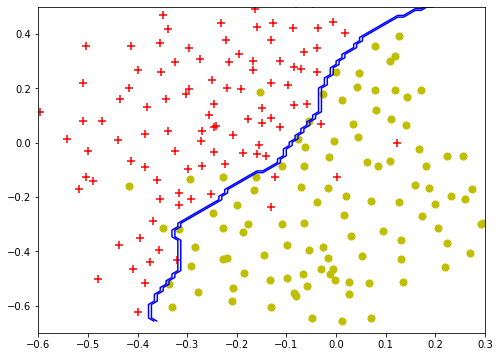

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c="r",marker="+",s=50)
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c="y",marker="o",s=50)

# plotting the decision boundary
X_7,X_8 = np.meshgrid(np.linspace(X3[:,0].min(),X3[:,1].max(),num=100),np.linspace(X3[:,1].min(),X3[:,1].max(),num=100))
plt.contour(X_7,X_8,classifier4.predict(np.array([X_7.ravel(),X_8.ravel()]).T).reshape(X_7.shape),1,colors="b")
plt.xlim(-0.6,0.3)
plt.ylim(-0.7,0.5)

## Part Two<br>
Moving on to spam email classification. This problem is unique as it focuses more on data preprocessing than the actual modeling process. The emails need to process in a way that that could be used as input for the model. One way of doing so is to obtain the indices of all the words in an email based on a list of commonly used vocabulary.

In [24]:
file_contents = open("./Data/emailSample1.txt","r").read()
vocabList = open("./Data/vocab.txt","r").read()

In [25]:
vocabList = vocabList.split("\n")[:-1]

vocabList_d = {}
for ea in vocabList:
    value,key = ea.split("\t")[:]
    vocabList_d[key] = value

In [26]:
file_contents

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

Now we will implement a method that we will pre-process our data

In [27]:
def processEmail(email_contents,vocabList_d):
    # Lower case
    email_contents = email_contents.lower()
    
    # Handle numbers
    email_contents = re.sub("[0-9]+","number",email_contents)
    
    # Handle URLS
    email_contents = re.sub("[http|https]://[^\s]*","httpaddr",email_contents)
    
    # Handle Email Addresses
    email_contents = re.sub("[^\s]+@[^\s]+","emailaddr",email_contents)
    
    # Handle $ sign
    email_contents = re.sub("[$]+","dollar",email_contents)
    
    # Strip all special characters
    specialChar = ["<","[","^",">","+","?","!","'",".",",",":"]
    for char in specialChar:
        email_contents = email_contents.replace(str(char),"")
    email_contents = email_contents.replace("\n"," ")    
    
    # Stem the word
    ps = PorterStemmer()
    email_contents = [ps.stem(token) for token in email_contents.split(" ")]
    email_contents= " ".join(email_contents)
    
    # Process the email and return word_indices
    
    word_indices=[]
    
    for char in email_contents.split():
        if len(char) >1 and char in vocabList_d:
            word_indices.append(int(vocabList_d[char]))
    
    return word_indices

In [28]:
word_indices = processEmail(file_contents, vocabList_d)

After getting the indices of the words, we need to convert the indices into a features vector.

In [29]:
def emailFeatures(word_indices, vocabList_d):
    n = len(vocabList_d)
    
    features = np.zeros((n, 1))
    
    for i in word_indices:
        features[i] = 1
        
    return features

In [30]:
features = emailFeatures(word_indices,vocabList_d)
print("Length of feature vector: ", len(features))
print("Number of non-zero entries: ", np.sum(features))

Length of feature vector:  1899
Number of non-zero entries:  43.0


Training SVM for spam classification

In [32]:
spam_mat = loadmat("./Data/spamTrain.mat")
X_train =spam_mat["X"]
y_train = spam_mat["y"]

In [33]:
C = 0.1
spam_svc = SVC(C = 0.1, kernel = "linear")
spam_svc.fit(X_train,y_train.ravel())
print("Training Accuracy:",(spam_svc.score(X_train,y_train.ravel()))*100,"%")

Training Accuracy: 99.825 %


In [34]:
spam_mat_test = loadmat("./Data/spamTest.mat")
X_test = spam_mat_test["Xtest"]
y_test =spam_mat_test["ytest"]

In [35]:
spam_svc.predict(X_test)
print("Test Accuracy:",(spam_svc.score(X_test,y_test.ravel()))*100,"%")

Test Accuracy: 98.9 %


To better understand our model, we could look at the weights of each word and figure out the words that are most predictive of a spam email.

In [36]:
weights = spam_svc.coef_[0]
weights_col = np.hstack((np.arange(1,1900).reshape(1899,1),weights.reshape(1899,1)))
df = pd.DataFrame(weights_col)

df.sort_values(by=[1],ascending = False,inplace=True)

predictors = []
idx=[]
for i in df[0][:15]:
    for keys, values in vocabList_d.items():
        if str(int(i)) == values:
            predictors.append(keys)
            idx.append(int(values))

In [37]:
print("Top predictors of spam:")

for _ in range(15):
    print(predictors[_],"\t\t",round(df[1][idx[_]-1],6))

Top predictors of spam:
our 		 0.500614
click 		 0.465916
remov 		 0.422869
guarante 		 0.383622
visit 		 0.36771
basenumb 		 0.345064
dollar 		 0.323632
will 		 0.269724
price 		 0.267298
pleas 		 0.261169
most 		 0.257298
nbsp 		 0.253941
lo 		 0.253467
ga 		 0.248297
hour 		 0.246404
